In [27]:
import radial
import angular

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exploring values of inversion error function

In [3]:
radial.Leaver_Cf_trunc_inversion(0.4-0.2j, 0., -2, 2, 4.+0.j, 0, 300, 1.+0.j)

(-3.7832264403820357-1.8368923380529323j)

In [121]:
Npts=100
omegar=np.arange(0.2, .5, .3/Npts)
omegai=np.arange(-0.2, -0., .2/Npts)
Or, Oi = np.meshgrid(omegar, omegai)
Os = Or + 1.j*Oi

In [122]:
leav1 = lambda omega: radial.Leaver_Cf_trunc_inversion(omega, 0., -2, 2, 4.+0.j, 0, 300, 0.j)
leavf = np.vectorize(leav1)
Leavers = leavf(Os)

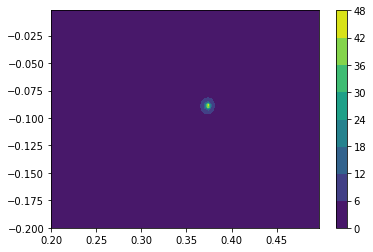

In [123]:
CS = plt.contourf(Or, Oi, 1/np.abs(Leavers))
plt.colorbar(CS)
plt.show()

In [124]:
angular.sep_const_closest(4., -2, 0.1, 2, 20)

(3.7252106530184745+0j)

In [125]:
Npts=100
orrange=[.28, .38]
oirange=[-.5,-.25]
omegar=np.arange(orrange[0], orrange[1], (orrange[1]-orrange[0])/Npts)
omegai=np.arange(oirange[0], oirange[1], (oirange[1]-oirange[0])/Npts)
Or, Oi = np.meshgrid(omegar, omegai)
Os = Or + 1.j*Oi

In [127]:
a = 0.0
s = -2
m = 2
l = 2

n_inv = 2
Nr = 300
r_N = 0.
l_max = 20

leav1 = lambda omega: radial.Leaver_Cf_trunc_inversion(omega, a, s, m, 
                                                       angular.sep_const_closest(angular.SWSphericalH_A(s,l,m),
                                                                                 s, a*omega, m, l_max),
                                                       n_inv, Nr, r_N)
leavf = np.vectorize(leav1)
Leavers = leavf(Os)

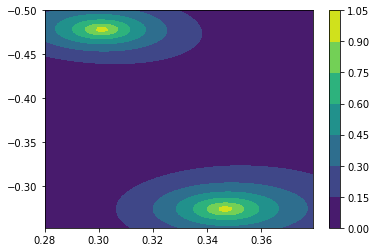

In [136]:
CS = plt.contourf(Or, Oi, np.exp(-np.abs(Leavers)))
plt.gca().invert_yaxis()
plt.colorbar(CS)
plt.show()

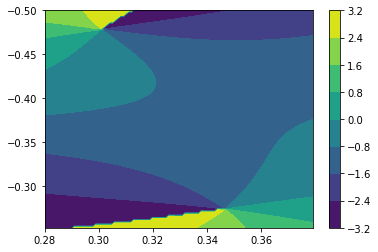

In [135]:
CS = plt.contourf(Or, Oi, np.angle(Leavers))
plt.gca().invert_yaxis()
plt.colorbar(CS)
plt.show()

In [11]:
from scipy import optimize

In [12]:
a = 0.5
s = -2
m = 2

n_inv = 3
Nr = 300
r_N = 0.
l_max = 20

A0 = 4.
omega_guess = 1.-1.j

def leavA(x):
    omega = x[0] + 1.j*x[1]
    A = angular.sep_const_closest(A0, s, a*omega, m, l_max)
    Leav_err = radial.Leaver_Cf_trunc_inversion(omega, a, s, m, A, n_inv, Nr, r_N)
    return [np.real(Leav_err), np.imag(Leav_err)]

sol = optimize.root(leavA, [np.real(omega_guess), np.imag(omega_guess)], tol=1e-10)
print(sol)
omega_sol = sol.x[0] + 1.j*sol.x[1]
print(omega_sol)

    fjac: array([[-0.58055883, -0.81421831],
       [ 0.81421831, -0.58055883]])
     fun: array([ 1.33226763e-14, -1.33226763e-14])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([-1.57221040e-12, -7.31598543e-13])
       r: array([-37.7375798 , -11.24345049,  -6.74371103])
  status: 1
 success: True
       x: array([ 0.34833034, -0.8319382 ])
(0.34833033663025764-0.8319382006483369j)


In [13]:
angular.sep_consts(s, a*omega_sol, m, l_max)

array([  3.65472734+1.22498937j,   9.82054178+0.6074719j ,
        17.90847623+0.38296443j,  27.95862701+0.27548481j,
        39.98916164+0.215713j  ,  54.00893186+0.17902532j,
        70.02240192+0.15487222j,  88.03196779+0.13811716j,
       108.03899516+0.12601303j, 130.04430444+0.11698107j,
       154.04841106+0.11006087j, 180.05165144+0.10464061j,
       208.05425245+0.10031534j, 238.05637147+0.09680831j,
       270.05812039+0.09392509j, 304.05958047+0.09152584j,
       340.06081191+0.08950783j, 418.04932771+0.07278469j,
       378.0618591 +0.08785411j])

In [14]:
angular.sep_consts(s, 0., 2, 20)

array([  4.+0.j,  10.+0.j,  18.+0.j,  28.+0.j,  40.+0.j,  54.+0.j,
        70.+0.j,  88.+0.j, 108.+0.j, 130.+0.j, 154.+0.j, 180.+0.j,
       208.+0.j, 238.+0.j, 270.+0.j, 304.+0.j, 340.+0.j, 378.+0.j,
       418.+0.j])

# Testing the nearby_root_finder class

In [2]:
import QNM_root_finder

In [3]:
tol = 1e-10
a = 0.5
s = -2
m = 2

n_inv = 3
Nr = 300
r_N = 0.
l_max = 20

A0 = 4.
omega_guess = 1.-1.j

In [4]:
finder = QNM_root_finder.nearby_root_finder(a=a, s=s, m=m, A_closest_to=A0,
                                            l_max=l_max, omega_guess=omega_guess,
                                            tol=tol, n_inv=n_inv, Nr=Nr, r_N=r_N)

In [5]:
finder.do_solve()

(0.3483303366364627-0.8319382005769503j)

In [6]:
finder.set_params(a=0.1)
finder.set_params(Nr=300)
o1 = finder.do_solve()
finder.set_params(Nr=301)
o2 = finder.do_solve()
print(o1)
print(o1-o2)
print(np.abs(o1-o2))

(-0.18955722077138332-0.9633880334067098j)
(6.819921724576794e-08-9.111526855232199e-08j)
1.1381179814192027e-07


In [7]:
finder.set_params(a=0.3)
finder.set_params(l_max=20)
o1 = finder.do_solve()
finder.set_params(l_max=21)
o2 = finder.do_solve()
print(o1)
print(o1-o2)
print(np.abs(o1-o2))

(0.24695762233292828-1.1067118774808864j)
(-1.7486012637846216e-15-8.881784197001252e-16j)
1.9612412612756718e-15


# Testing the QNM_seq_root_finder class

In [248]:
a_max = .97

ns=np.arange(0,7)
s=-2
l=2
m=2
seqs = [None] * len(ns)
for n in ns:
    seqs[n] = QNM_root_finder.QNM_seq_root_finder(n=n, a_max=a_max, delta_a=5e-3, s=s, l=l, m=m)
    seqs[n].do_find_sequence()

n=0, l=2, started from guess omega=(0.374036081992-0.0911789455291j), found omega=(0.373671684418-0.0889623156889j)
n=1, l=2, started from guess omega=(0.349062830271-0.277949731175j), found omega=(0.346710996879-0.273914875291j)
n=2, l=2, started from guess omega=(0.305379974467-0.479107355103j), found omega=(0.301053454613-0.478276983223j)
n=3, l=2, started from guess omega=(0.255514809859-0.708070224558j), found omega=(0.251504961583-0.705148202122j)
n=4, l=2, started from guess omega=(0.218258279365-0.983997519371j), found omega=(0.207514622615-0.946845048616j)
n=5, l=2, started from guess omega=(0.218664973542-1.33408550099j), found omega=(0.133308194177-1.4479815787j)
n=6, l=2, started from guess omega=(0.288053130586-1.79586382153j), found omega=(0.0921490746175-1.70442033203j)


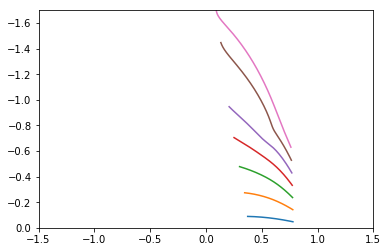

In [249]:
for n in ns:
    plt.plot(np.real(seqs[n].omega), np.imag(seqs[n].omega))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.7,0.)
plt.gca().invert_yaxis()
plt.show()

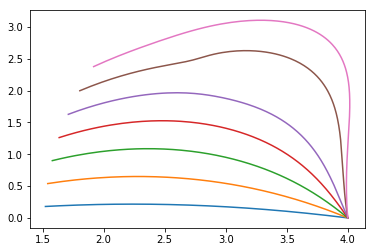

In [250]:
for n in ns:
    plt.plot(np.real(seqs[n].A), np.imag(seqs[n].A))
plt.show()

In [184]:
ni = 2
ai = 110
seqs[ni].solver.set_params(omega_guess=seqs[ni].omega[ai], A_closest_to=seqs[ni].A[ai], Nr=300)
o1 = seqs[ni].solver.do_solve()
seqs[ni].solver.set_params(Nr=301)
o2 = seqs[ni].solver.do_solve()
print(o1-o2)

(5.016405426577775e-06+5.721586055473793e-05j)


In [200]:
ni = 5
ai = 180
seqs[ni].solver.set_params(omega_guess=seqs[ni].omega[ai], A_closest_to=seqs[ni].A[ai], l_max=20)
o1 = seqs[ni].solver.do_solve()
seqs[ni].solver.set_params(l_max=21)
o2 = seqs[ni].solver.do_solve()
print(o1-o2)

(1.6653345369377348e-15+1.1102230246251565e-16j)


In [185]:
seqs[ni].solver.opt_res

    fjac: array([[-0.32466219,  0.94583004],
       [-0.94583004, -0.32466219]])
     fun: array([ 1.15463195e-13, -2.14939178e-13])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([4.94783563e-11, 3.21171039e-11])
       r: array([-5.29678207,  0.04660311, -5.28457024])
  status: 1
 success: True
       x: array([-0.1387521 , -0.77039185])

In [247]:
reload(Schw_QNM_expans)
reload(QNM_root_finder)

<module 'QNM_root_finder' from 'QNM_root_finder.pyc'>